# Predicting Heart Diseases - Training 

# Improving the model using Pruning Technique

In the Heart Data set below, we have to predict weather the person will get a heart attack.
We build a model using entropy. <br><br>
Pre Pruning:<br>
First we trainign the model to the full depth of the tree. <br><br>
Post Pruning:<br>
We are using the Pruning technique to improve the model. 
We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.


using Pruning

In [5]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:

data = 'heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


 Let us see pre prune and post prune the decision tree results

In [7]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 12)
(303,)


Splitting dataset to train and test

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 12)
(76, 12)


# PrePruning

First we will fit a normal decision tree without any fine tuning and check the results 

# Tree is built is using Entropy

In [9]:
clf = tree.DecisionTreeClassifier(random_state=0)


clf.fit(x_train,y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


### Visualizing decision tree

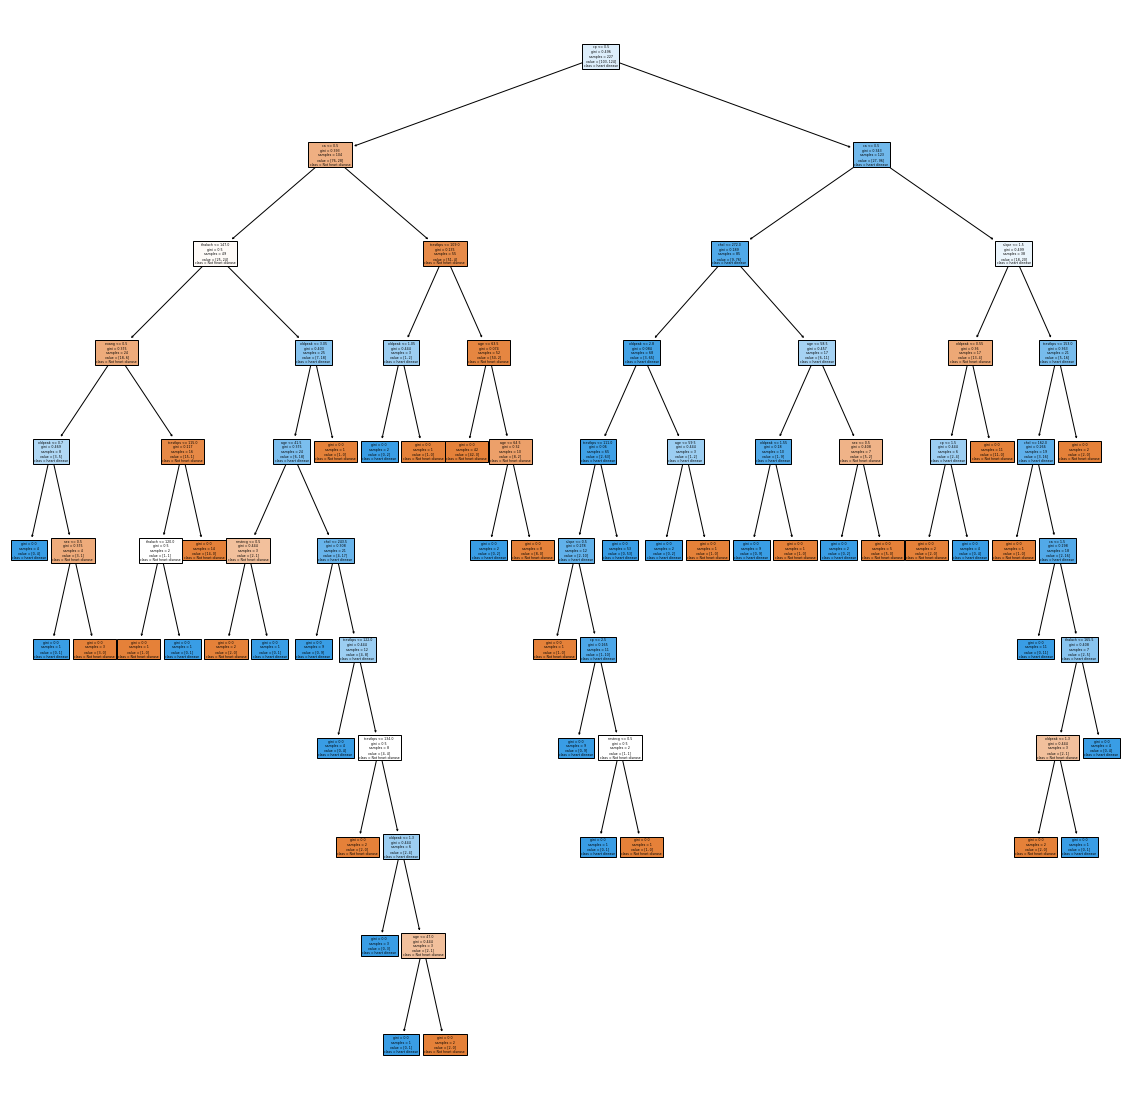

In [10]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [11]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
    

Train score 1.0
Test score 0.7105263157894737
Train Confusion matrix


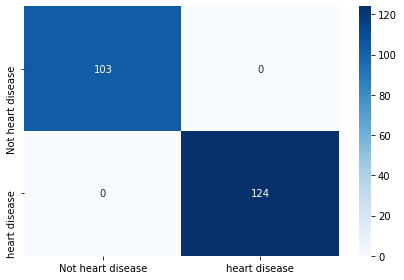

Test Confusion matrix


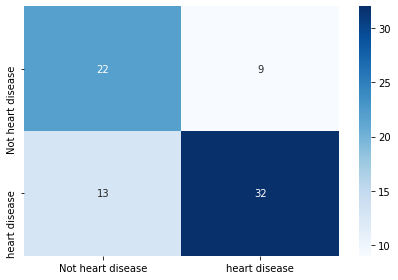

In [12]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

We can see that in our train data we have 100% accuracy (100 % precison and recall). But in 
test data model is not well generalizing. We have just 75% accuracy.
Over model is clearly overfitting. We will avoid overfitting through pruning. We will do cost complexity prunning

# Post pruning techniques



There are several post pruning techniques. Cost complexity pruning is one of the important among them.

## Cost Complexity Pruning


Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like *max_depth* , *min_samples* etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for **alpha**.We will get the alpha values for this tree and will check the accuracy with the pruned trees.


In [15]:
path = clf.cost_complexity_pruning_path(x_train, y_train)

clf.cost_complexity_pruning_path(
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#print(ccp_alphas)

#clf.cost_complexity_pruning_path(
#clf.cost_complexity_pruning_path(
#path.

SyntaxError: invalid syntax (<ipython-input-15-3392abc80698>, line 5)

In [16]:

# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    
    clf.fit(x_train, y_train)
    clfs.append(clf)

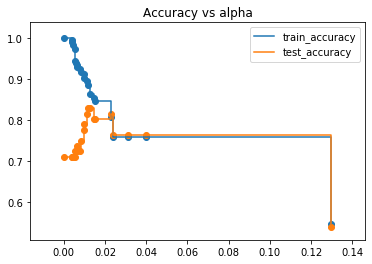

In [17]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.020

Train score 0.8458149779735683
Test score 0.8026315789473685
Train Confusion matrix


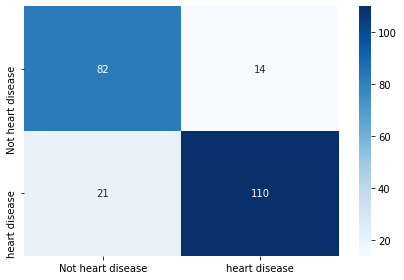

Test Confusion matrix


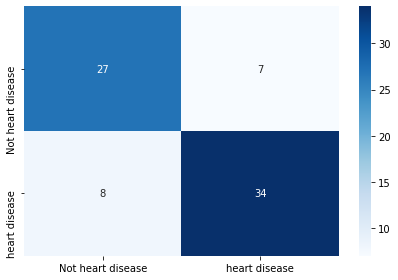

In [18]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

We can see that now our model is not overfiting and performance on test data have improved

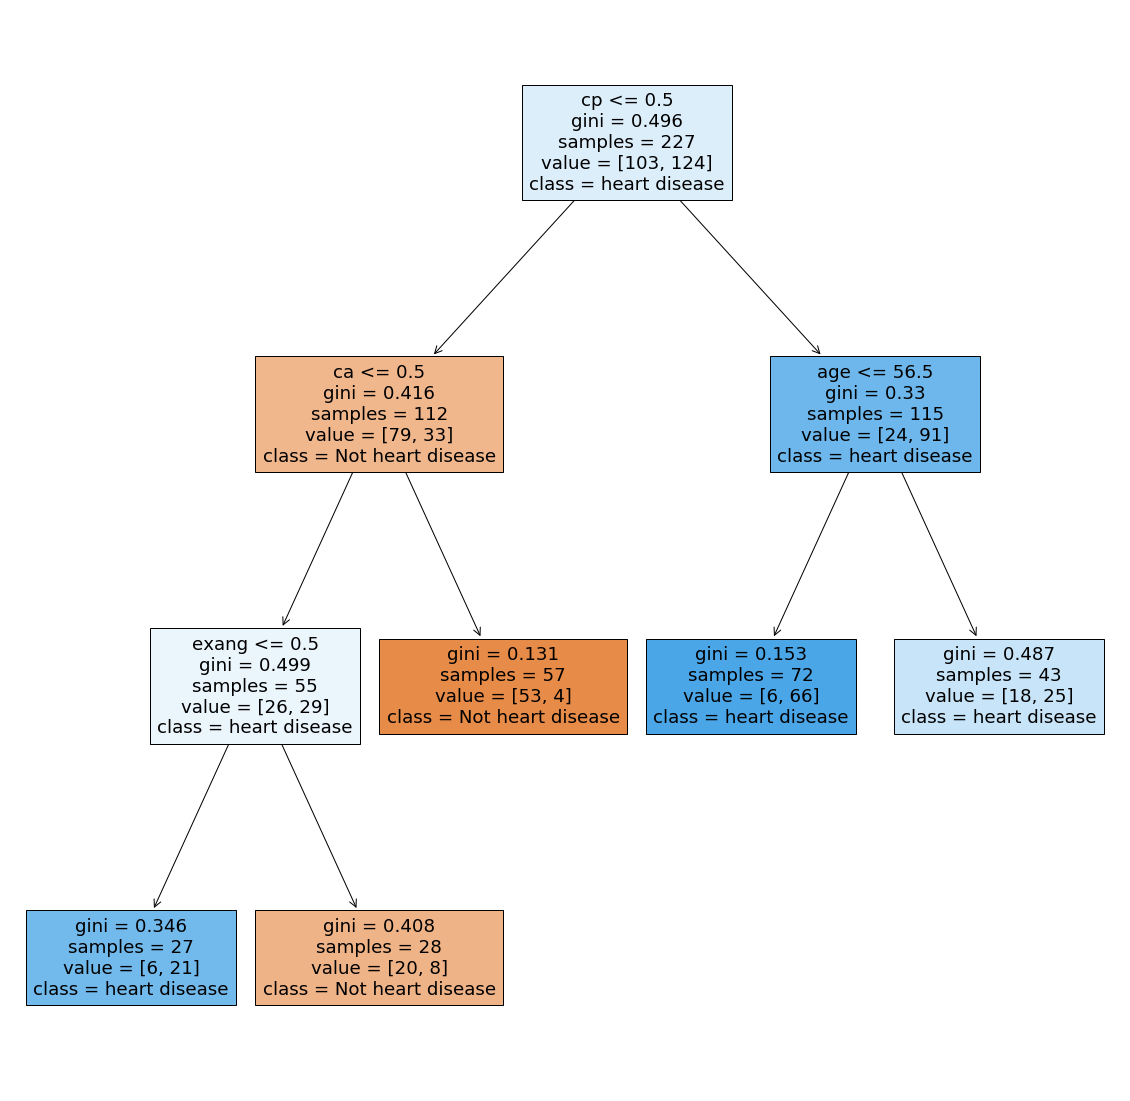

In [28]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

We can see that the size of decision tree significantly got reduced. 